# Hey README, tell me your secrets 

In [1]:
# data wrangling
import pandas as pd
import numpy as np
import json

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

# modules
import acquire
import prepare
import explore
import model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

A list of 100 pages to scrape are generated using the `acquire.loop_through_urls` function. They are saved to a csv and that csv file is being read for further manipulation. 

In [2]:
# to_scrape = acquire.loop_through_urls()
# to_scrape = pd.DataFrame(to_scrape)
# to_scrape.to_csv("URL_list_100_final.csv")

In [3]:
# read in list of pages generated from function 
pd.read_csv("URL_list_100.csv", header=0, names=["page"])

,page
0,http://github.com/freeCodeCamp/freeCodeCamp
1,http://github.com/996icu/996.ICU
2,http://github.com/vuejs/vue
3,http://github.com/facebook/react
4,http://github.com/tensorflow/tensorflow
...,...
95,http://github.com/ansible/ansible
96,http://github.com/kdn251/interviews
97,http://github.com/gatsbyjs/gatsby
98,http://github.com/opencv/opencv


The dataframe of 100 pages that was just created is looped through, and on each page, it's respective repository, language, and readme is extracted as a dictionary, using the `acquire.make_corpus` function. 

The `acquire.get_corpus` fuction checks to see if the data file is in the cache. If it is, it reads it in as a dataframe, if file is not in cache, the above mentioned function is run to generate it.

In [4]:
df = acquire.get_big_corpus()

In [5]:
df

,repo,language,readme
0,freeCodeCamp/freeCodeCamp,JavaScript,\n\n\n\n\n\nfreeCodeCamp.org's open-source cod...
1,996icu/996.ICU,Rust,\n996.ICU\nPlease note that there exists NO ot...
2,vuejs/vue,JavaScript,\n\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue...
3,facebook/react,JavaScript,\nReact · \nReact is a JavaScript library f...
4,tensorflow/tensorflow,C++,\n\n\n\n\n\n\nDocumentation\n\n\n\n\n\n\n\n\nT...
...,...,...,...
85,Trinea/android-open-project,None,\nAndroid 开源项目分类汇总，更全更新可见 codekk.com\nOther: E...
86,PhilJay/MPAndroidChart,Java,\n\n\n\n\n\n\n⚡️ A powerful & easy to use char...
87,tiimgreen/github-cheat-sheet,None,\nGitHub Cheat Sheet \nA collection of cool hi...
88,XX-net/XX-Net,Python,\nXX-Net\n中文文档 English فارسی صفحه اص...


## Prepare

In [6]:
df.language.value_counts(dropna=False)

JavaScript          59
None                29
Python              21
Java                15
C++                 12
Go                   9
TypeScript           9
CSS                  5
C                    4
Vue                  3
Ruby                 3
PHP                  2
Shell                2
Jupyter Notebook     2
HTML                 2
Rust                 2
Kotlin               2
Swift                2
Dart                 1
Assembly             1
C#                   1
Vim script           1
Clojure              1
Objective-C          1
Dockerfile           1
Name: language, dtype: int64

Using the `prepare.cut_singles` function, retain only the top ten language and their respective rows.

In [7]:
df = prepare.cut_singles(df)

In [8]:
df.language.value_counts()

JavaScript    59
None          29
Python        21
Java          15
C++           12
TypeScript     9
Go             9
CSS            5
C              4
Vue            3
Name: language, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 89
Data columns (total 3 columns):
repo        166 non-null object
language    166 non-null object
readme      166 non-null object
dtypes: object(3)
memory usage: 5.2+ KB


In [10]:
df['prepared'] = df.readme.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [11]:
df

,repo,language,readme,prepared
0,freeCodeCamp/freeCodeCamp,JavaScript,\n\n\n\n\n\nfreeCodeCamp.org's open-source cod...,freecodecamporg's opensource codebase curricul...
2,vuejs/vue,JavaScript,\n\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue...,supporting vuejs vuejs mitlicensed open source...
3,facebook/react,JavaScript,\nReact · \nReact is a JavaScript library f...,react react javascript library building user i...
4,tensorflow/tensorflow,C++,\n\n\n\n\n\n\nDocumentation\n\n\n\n\n\n\n\n\nT...,documentation tensorflow endtoend open source ...
5,twbs/bootstrap,JavaScript,"\n\n\n\n\n\nBootstrap\n\n Sleek, intuitive, a...",bootstrap sleek intuitive powerful frontend fr...
...,...,...,...,...
85,Trinea/android-open-project,None,\nAndroid 开源项目分类汇总，更全更新可见 codekk.com\nOther: E...,android codekkcom english version website vers...
86,PhilJay/MPAndroidChart,Java,\n\n\n\n\n\n\n⚡️ A powerful & easy to use char...,powerful easy use chart library android chart ...
87,tiimgreen/github-cheat-sheet,None,\nGitHub Cheat Sheet \nA collection of cool hi...,github cheat sheet collection cool hidden hidd...
88,XX-net/XX-Net,Python,\nXX-Net\n中文文档 English فارسی صفحه اص...,xxnet english gaeproxyxtunnel gaeproxy xtunnel...


## Explore

The breakdown of programming languages 

In [12]:
explore.count_percent(df)

,n,percent
JavaScript,59,0.355422
None,29,0.174699
Python,21,0.126506
Java,15,0.090361
C++,12,0.072289
TypeScript,9,0.054217
Go,9,0.054217
CSS,5,0.030120
C,4,0.024096
Vue,3,0.018072


Explore the lengths of readmes based on their respective programming language

In [13]:
explore.readme_length(df)

,min,mean,max
language,,,
C,98,2423.500000,6075
C++,59,758.500000,2288
CSS,228,475.800000,821
Go,65,3634.555556,21653
Java,126,848.800000,3568
JavaScript,73,2133.033898,19624
None,70,4422.206897,25882
Python,4,3071.333333,13706
TypeScript,52,588.777778,2641


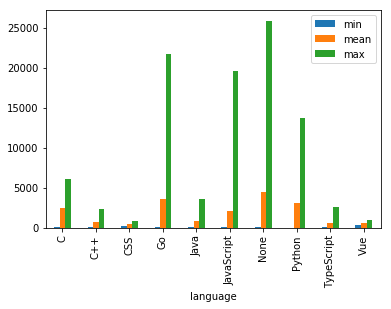

In [17]:
explore.readme_length(df).plot.bar()
plt.show()

## Split

The data is broken into training and testing sets. In this instance it will be a 70/30 split.

In [18]:
X_train, X_test, train, test = model.make_model_components(df.prepared, df.language, .30)

## Model - Decision Tree

In [19]:
classifier = model.make_tree_model(X_train, train.actual)

In [20]:
training_predictions = classifier.predict(X_train)
train['predictions'] = training_predictions
test_predictions = classifier.predict(X_test)
test['predictions'] = test_predictions

#### Accuracy scores for the model on the Training set

In [21]:
model.score_your_model(train.actual, train.predictions)

Accuracy: 75.86%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  TypeScript  Vue
predictions                                                                  
C++          0    1    0   0     0           0     0       0           0    0
CSS          0    0    2   0     0           0     0       0           0    0
Go           3    4    1   6     1           2     4       3           3    0
Java         0    0    0   0    10           0     0       0           0    0
JavaScript   0    0    1   0     0          38     0       0           0    0
None         0    0    0   0     0           0    16       0           0    0
Python       0    3    0   0     0           1     0      12           0    0
TypeScript   0    0    0   0     0           0     0       0           3    2
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         3
         C++       1.00      0.12      0.22         8
         CSS   

#### Accuracy scores for the model on the Test set

In [22]:
model.score_your_model(test.actual, test.predictions)

Accuracy: 48.00%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  TypeScript  Vue
predictions                                                                  
C++          0    1    0   0     0           2     0       0           0    0
CSS          0    0    0   0     0           1     0       0           0    0
Go           1    1    0   2     1           1     3       1           1    0
Java         0    0    0   0     3           0     0       0           0    0
JavaScript   0    1    1   0     0          12     3       0           2    1
None         0    0    0   1     0           0     3       2           0    0
Python       0    1    0   0     0           1     0       3           0    0
TypeScript   0    0    0   0     0           1     0       0           0    0
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         1
         C++       0.33      0.25      0.29         4
         CSS   

## Model - Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

def make_forest_model(X,y,depth=20,trees=100):
    rf = RandomForestClassifier(max_depth=depth, n_estimators=trees, random_state=42).fit(X, y)
    return rf

In [99]:
classifier = make_forest_model(X_train, train.actual, depth=10, trees=5)

In [100]:
training_predictions = classifier.predict(X_train)
train['predictions'] = training_predictions
test_predictions = classifier.predict(X_test)
test['predictions'] = test_predictions

In [101]:
model.score_your_model(train.actual, train.predictions)

Accuracy: 75.00%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  TypeScript  Vue
predictions                                                                  
C            2    0    0   0     0           0     0       0           0    0
C++          0    2    0   0     0           0     0       0           0    0
CSS          0    0    3   0     0           0     0       0           0    0
Go           0    0    0   4     0           0     0       0           0    0
Java         0    0    0   0     5           1     0       0           0    0
JavaScript   1    4    1   2     6          40     2       4           5    0
None         0    1    0   0     0           0    18       0           1    0
Python       0    1    0   0     0           0     0      11           0    0
Vue          0    0    0   0     0           0     0       0           0    2
---
              precision    recall  f1-score   support

           C       1.00      0.67      0.80  

In [102]:
model.score_your_model(test.actual, test.predictions)

Accuracy: 36.00%
---
Confusion Matrix
actual       C  C++  CSS  Go  Java  JavaScript  None  Python  TypeScript  Vue
predictions                                                                  
C++          0    0    0   0     0           1     0       0           0    0
JavaScript   1    4    1   2     4          15     7       4           3    1
None         0    0    0   1     0           0     2       0           0    0
Python       0    0    0   0     0           2     0       1           0    0
TypeScript   0    0    0   0     0           0     0       1           0    0
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         1
         C++       0.00      0.00      0.00         4
         CSS       0.00      0.00      0.00         1
          Go       0.00      0.00      0.00         3
        Java       0.00      0.00      0.00         4
  JavaScript       0.36      0.83      0.50        18
        None       0.67      0.22